# Monte Carlo Example
#### by Elizabeth Barnes

An illustration of using Monte Carlo techniques.

#### The problem

This example is based on the "Monte Carlo simulation" example in Chapter 1 of the lecture notes. The idea is as follows...

In January (31 days), the maximum daily temperature was 2.2 standard deviations from the climatological mean temperature. If we assume that daily temperatures are normally distributed, how rare is it to have a maximum of 2.2$\sigma$ or greater in 31 daily samples?

#### The approach

While we have lots of nice statistical tests for the mean, and even the variance, we've ventured outside of this into the realm of maxima! So what do we do? Since the maximum is a pretty common quantity, there are in fact tests we could use. However, we could also take a Monte Carlo approach (which is what we will do given the title of this example) to solve our problem.

The idea is that since we _know_ the underlying population is normal, we can just make some "fake" data and play around with it to find out how rare a 2.2$\sigma$ maximum really is. 

The first step, of course, is to import our packages.

In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

#.............................................
# IMPORT STATEMENTS
#.............................................
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import importlib

import general_functions as gf
importlib.reload(gf)
gf.add_parent_dir_to_path()

from lib import class_general_functions as cgf
importlib.reload(cgf)

#.............................................
# PLOTTING COMMANDS
#.............................................
gf.cc()
plt.ioff()

Setup our variables. The "drawn_max" variable is where we set the maximum we actually got in our 31 samples, and "sample_length" sets the number of values in our sample (i.e. N).

In [2]:
drawn_max = 2.2
sample_length = 31

Next, we are going to make a long list of values drawn from a random normal distribution (call this data set "Z"). We will also initialize an empty array "M" where we will ultimately store the maximum values from many many different samples of length N=31.

In [3]:
Z = np.random.randn(1000000,1)
M = np.empty([10000000, 1])

Next we do the heavy lifting. The idea is that since we know our underlying data is normal, we are going to randomly grab N=31 values from this huge list (Z), calculate the maximum in the sample, save it, then rinse and repeat. We will do this 10,000,000 times. 

In [4]:
for iloop in range(np.size(M)):
    ip = np.random.randint(low=0,high=Z.shape[0],size=sample_length) 
    M[iloop] = np.max(Z[ip])

Ok - so what do we have now? Well, we now have 10,000,000 maximum values from 10,000,000 samples of N=31. So, we can plot the distribution of these maxima (M), and see what they look like! We can then see how rare our actual maximum that we actually got (i.e. drawn_max = 2.2) is. Check it out.

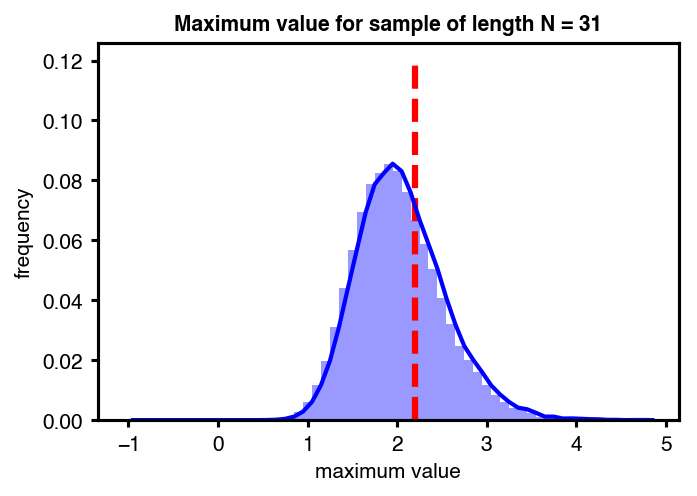

In [5]:
cgf.fig(2)
bin_width = .1
bin_list = np.arange(-1,5,bin_width)
n, bins = np.histogram(M, bins=bin_list, density=False)
plt.plot([drawn_max, drawn_max],[0, .12],color='red',linewidth=3,linestyle='--')
plt.bar(bins[0:-1],n/float(len(M)),bin_width, facecolor='blue', alpha=0.4)
plt.plot(bins[0:-1]+bin_width/2,n/float(len(M)),color='blue')

plt.xlabel('maximum value')
plt.ylabel('frequency')
titlename = 'Maximum value for sample of length N = ' + str(sample_length) 
plt.title(titlename)

plt.show()

The blue shading and line denotes the frequency of the maxima we got from the 10,000,000 samples of length N=31 (drawn from a normal don't forget). The red line denotes what we _actually_ got from our real data. How rare is it? Well, just looking at the plot it is pretty clear that a maximum of 2.2 is not rare at all. Of course, we can calculate the number of values in M above 2.2 to see the probability.

In [6]:
100.*float(sum(M>drawn_max)/np.size(M))

35.075070000000004

So, 35% of the 10,000,000 samples actually had maxima of 2.2 or bigger! So truly, not rare at all.